# DEPRESSION DETECTION USING NLP AND MACHINE LEARNING

In [2]:
import json
import pandas as pd
import time
import numpy as np
import itertools
import matplotlib.pyplot as plt 
import csv
import re
import string
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import gensim
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# sklearn
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,f1_score ,precision_score,classification_report
from sklearn.metrics import roc_auc_score


In [3]:
tweets_data = []
x = []
y = []
k = []
some_milby = []
dataurl = 'data/tweetdata.txt'

In [4]:
print("Retrieving TXT File")
tweets_data_path = dataurl
tweets_file = open(tweets_data_path, "r")
    
for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
print("===========================")
print("Retrieving Successfull")
print("=========================== \n \n")
time.sleep(3)
# processdata()

Retrieving TXT File
Retrieving Successfull
 



In [5]:
# def processdata():
print("===========================")
print("Recovering Data Teets")
print("===========================")
time.sleep(1)
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
for i in range(len(tweets_data)):
           
            tweet = tweets_data[i]['text']
            tweet = re.sub(r'@\S+', '', tweet)
            tweet = re.sub(r'http\S+', '', tweet)
            tweet = re.sub(r'https\S+', '', tweet)
            tweet = re.sub(r'RT', '', tweet)
            tweet = RE_EMOJI.sub(r'', tweet)
            tweet = tweet.translate(str.maketrans('','',string.punctuation))
            
print("===========================")
print("Data Tweets Recovered")
print("===========================\n\n")

Recovering Data Teets
Data Tweets Recovered




In [6]:
# print(tweets_data[0])

In [7]:
polarityfile = "data/dictionary.tsv"
with open(polarityfile) as tsvfile:
  reader = csv.reader(tsvfile, delimiter='\t')
  for row in reader:
      i = []
      i.append(row[2])
      i.append(row[5])
      y.append(i)
print(f"Word Polarity : {y[0:5]}")

Word Polarity : [['abandoned', 'negative'], ['abandonment', 'negative'], ['abandon', 'negative'], ['abase', 'negative'], ['abasement', 'negative']]


In [8]:
def addpolarity():  
    start_time = time.time()
    counter = 0

    
       
    for j in x:
 
            tweet_token = j
            token = word_tokenize(tweet_token)
            sumnum = 0
            sum_word = 0
            for t in token:
     
                for d in y:
                    if t == d[0]:
                        sentiment = d[1]
                        if sentiment == "positive":
                            sumnum += 1
                            sum_word += 1

                        elif sentiment == "negative":
                            sumnum += -1
                            sum_word += 1

                        else:
                            sumnum += 0
                            sum_word += 1


                        break
                 
            
            if sum_word != 0.0:
                sum_more = sumnum / sum_word
                if sum_more >= 0.2:
                    sum_more = 1
   
                elif (sum_more < 0.2) and (sum_more > -0.5):
                    sum_more = 0
                   
                elif sum_more <= -0.5:
                    sum_more = -1
                   
                else:
                    print("****")
                    
                
            sum_var = []    
            varid = k[counter]
            sum_var.append(varid)
            sum_var.append(sum_more)
            some_milby.append(sum_var)
            counter += 1
            
    print("Processing time: ", round((time.time() - start_time),8), "Seconds \n\n")
    
    time.sleep(3)
        
    savetoxlsx()

In [9]:
def savetoxlsx():
    df = pd.DataFrame(some_milby)
    df.to_excel('processed_data/output.xlsx', header=("id","sentiment"), index=False)
    

# Preprocessing

In [10]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [11]:
def retrieveTweet(data_url):

    tweets_data_path = data_url
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)            
def retrieveProcessedData(Pdata_url):
    sent = pd.read_excel(Pdata_url)
    for i in range(len(tweets_data)):
        if tweets_data[i]['id']==sent['id'][i]:
            tweet = tweets_data[i]['text']
            tweet = re.sub(r'@\S+', '', tweet)
            tweet = re.sub(r'http\S+', '', tweet)
            tweet = re.sub(r'https\S+', '', tweet)
            tweet = re.sub(r'RT', '', tweet)
            tweet = RE_EMOJI.sub(r'', tweet)
            tweet = tweet.translate(str.maketrans('','',string.punctuation))
            tweet = tweet.strip()
            x.append(tweet)
            y.append(sent['sentiment'][i])
    data = {'text': x, 'target': y}
    df = pd.DataFrame(data)
    return df

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in set(stopwordlist)])

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

def lemmatizer_on_text(data):
    lm = nltk.WordNetLemmatizer()
    text = [lm.lemmatize(word) for word in data]
    return data

def list_to_sentence(l):
    return " ".join(l)

def clean_tweets(dataset):
    #Lower case text
    dataset['text']=dataset['text'].str.lower()
    dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
    dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
    
    #tokenize
    dataset['text'] = dataset['text'].apply(word_tokenize)
    
    #lem
    dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
    dataset['text'] = dataset['text'].apply(lambda x: list_to_sentence(x))
    dataset = dataset[dataset['text']!='']
    
    return dataset
    

In [12]:
pd.set_option('display.max_colwidth', None)
tweets_data = []
x = []
y = []
retrieveTweet('data/tweetdata.txt')  
tweet_df = retrieveProcessedData('processed_data/output.xlsx')
tweet_df.head()

,text,target
0,Hey look I found my social anxiety again Was wondering where that went,-1
1,Depression sucks Im in the middle of it rn I know some of you are too Were going to make it,-1
2,Lol my social anxiety goes through the roof Dunno bout this one mate lol,-1
3,How to Deal with Stress Anxiety and Bipolar Disorder Anxiety is one of many troubling symptoms of bipolar di,-1
4,when you want to be friends w ppl but ppl think ur mean and unapproachable cus u have a resting bitch face and soci…,0


# EDA

In [13]:
tweet_df.columns

Index(['text', 'target'], dtype='object')

In [14]:
print('Length of dataset is', len(tweet_df))

Length of dataset is 9331


In [15]:
tweet_df.shape

(9331, 2)

In [16]:
tweet_df.info

<bound method DataFrame.info of                                                                                                                       text  \
0                                                  Hey look  I found my social anxiety again Was wondering where that went   
1                              Depression sucks Im in the middle of it rn I know some of you are too Were going to make it   
2                                                 Lol my social anxiety goes through the roof Dunno bout this one mate lol   
3            How to Deal with Stress Anxiety and Bipolar Disorder  Anxiety is one of many troubling symptoms of bipolar di   
4     when you want to be friends w ppl but ppl think ur mean and unapproachable cus u have a resting bitch face and soci…   
...                                                                                                                    ...   
9326                                            im still sad at the fact we’re never g

In [17]:
tweet_df.dtypes

text      object
target     int64
dtype: object

In [18]:
np.sum(tweet_df.isnull().any(axis=1))

0

In [19]:
print('Count of columns in the data is:  ', len(tweet_df.columns))
print('Count of rows in the data is:  ', len(tweet_df))

Count of columns in the data is:   2
Count of rows in the data is:   9331


In [20]:
tweet_df['target'].unique()

array([-1,  0,  1], dtype=int64)

In [21]:
tweet_df['target'].nunique()

3

<Axes: xlabel='target', ylabel='count'>

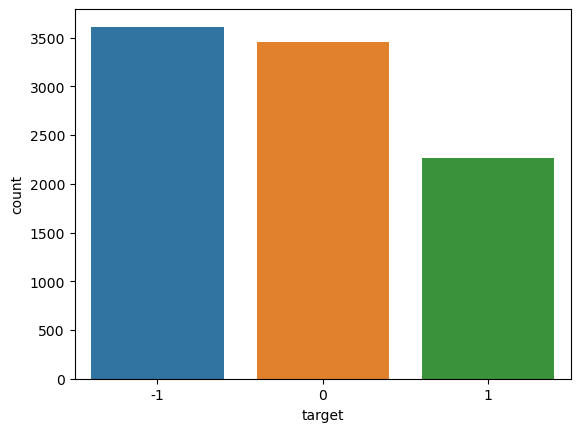

In [22]:
sns.countplot(x='target', data=tweet_df)

In [23]:
tweet_df.groupby(['target']).count()

,text
target,
-1,3611
0,3456
1,2264


In [23]:
# pos_data = tweet_df[tweet_df['target'] == 1]['text'].tolist()
# plt.figure(figsize = (20,20))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#                collocations=False).generate(" ".join(pos_data))
# plt.title("positive Wordcloud")
# plt.imshow(wc)

In [24]:
# neg_data = tweet_df[tweet_df['target'] == -1]['text'].tolist()
# plt.figure(figsize = (20,20))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#                collocations=False).generate(" ".join(neg_data))
# plt.title("Negative Wordcloud")
# plt.imshow(wc)

In [24]:
clean_df = clean_tweets(tweet_df.copy())
print(clean_df.shape)
clean_df.head()

(9275, 2)


,text,target
0,hey look found social anxiety wondering went,-1
1,depression sucks im middle rn know going make,-1
2,lol social anxiety goes roof dunno bout one mate lol,-1
3,deal stress anxiety bipolar disorder anxiety one many troubling symptoms bipolar di,-1
4,want friends w ppl but ppl think ur mean unapproachable cus u resting bitch face soci…,0


In [25]:
#clean_df.to_csv("Clean Data.csv")

In [26]:
X=clean_df.text
y=clean_df.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7420,), (1855,), (7420,), (1855,))

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

No. of feature_words:  39784


In [109]:
# from gensim.models import Word2Vec
# import pandas as pd

# sentences = clean_df['text'].tolist()

# # Train a Word2Vec model
# vectorizer = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# # vectorizer is a trained Word2Vec model

In [32]:
# sentences = clean_df['text'].tolist()

# # Convert each word in each sentence to its corresponding vector
# vectorized_sentences = [[vectorizer.wv[word] for word in sentence] for sentence in sentences]

# # Now 'vectorized_sentences' is a list of sentences, where each sentence is a list of vectors

In [33]:
# vectorized_sentences[0]

In [34]:

# # Take the average of all vectors in each sentence
# X1 = [np.mean(sentence, axis=0) for sentence in vectorized_sentences]
# X = np.stack(X1, axis=0)
# print(X.shape)
# # Assuming 'y' is your target variable
# y = np.array(clean_df['target'].tolist())
# print(y.shape)
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# len(X), X[0].shape, len(y), y[0]

In [36]:
# X[0]

In [37]:
# def retrieveProcessedData(Pdata_url):
#     sent = pd.read_excel(Pdata_url)
#     for i in range(len(tweets_data)):
#         if tweets_data[i]['id']==sent['id'][i]:
#             x.append(tweets_data[i]['text'])
#             y.append(sent['sentiment'][i])

In [30]:
fpr_dict = {}
tpr_dict = {}
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}
auc_dict = {}

In [32]:
def show_metrics(y_test, y_pred, model_name):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    fpr_dict[model_name] = fpr
    tpr_dict[model_name] = tpr
    auc = format(metrics.auc(fpr, tpr))
    auc = float(auc)*100
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred, average="weighted")
    accuracy_dict[model_name] = round(accuracy, 2)
    precision_dict[model_name] = round(precision, 2)
    recall_dict[model_name] = round(recall, 2)
    f1_dict[model_name] = round(f1score, 2)
    auc_dict[model_name] = round(auc, 2)
    print(f"{model_name} \nAccuracy : {accuracy}\nPrecision : {precision}\nRecall : {recall}\nf1_score : {f1score}")
    print(f"{model_name} confusion matrix : \n{confusion_matrix(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    labels = ['-1', '0', '1']
    if model_name == "XGBoost":
        labels = ['0', '1', '2']
    sns.heatmap(cm, annot=True, cmap='Reds', fmt='g',xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print()
    plt.style.use('seaborn')

    plt.plot(fpr, tpr, linestyle='--',color='red', label=model_name)
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show()

## Decision Tree Classifier

DTree 
Accuracy : 0.720754716981132
Precision : 0.7211519799706231
Recall : 0.720754716981132
f1_score : 0.7183673272749175
DTree confusion matrix : 
[[597  91  34]
 [170 443  69]
 [ 64  90 297]]
              precision    recall  f1-score   support

          -1       0.72      0.83      0.77       722
           0       0.71      0.65      0.68       682
           1       0.74      0.66      0.70       451

    accuracy                           0.72      1855
   macro avg       0.72      0.71      0.72      1855
weighted avg       0.72      0.72      0.72      1855



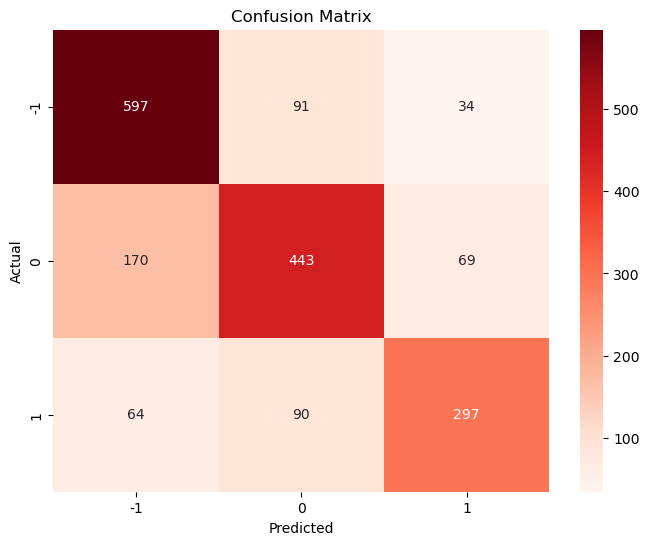

C:\Users\Soumya Ranjan Bhoi\AppData\Local\Temp\ipykernel_11736\2191598173.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


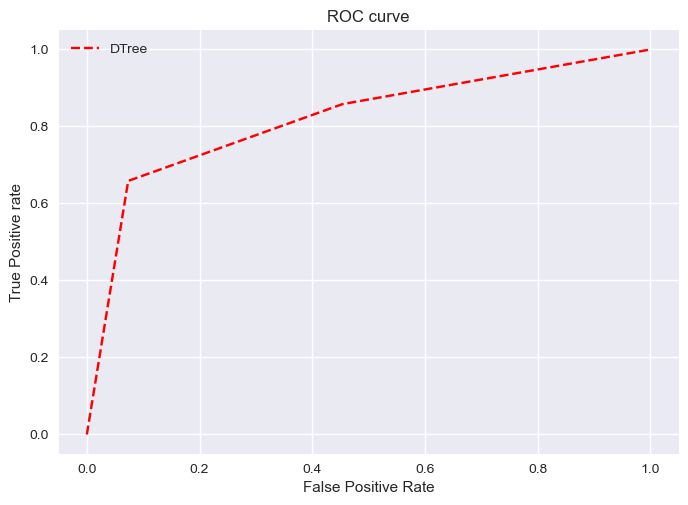

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
dtree = tree.DecisionTreeClassifier()

dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

show_metrics(y_test, y_pred, "DTree")

## Support Vector Classifier

SVC 
Accuracy : 0.7514824797843666
Precision : 0.7546820919208013
Recall : 0.7514824797843666
f1_score : 0.7506670813432615
SVC confusion matrix : 
[[601  99  22]
 [157 483  42]
 [ 42  99 310]]
              precision    recall  f1-score   support

          -1       0.75      0.83      0.79       722
           0       0.71      0.71      0.71       682
           1       0.83      0.69      0.75       451

    accuracy                           0.75      1855
   macro avg       0.76      0.74      0.75      1855
weighted avg       0.75      0.75      0.75      1855



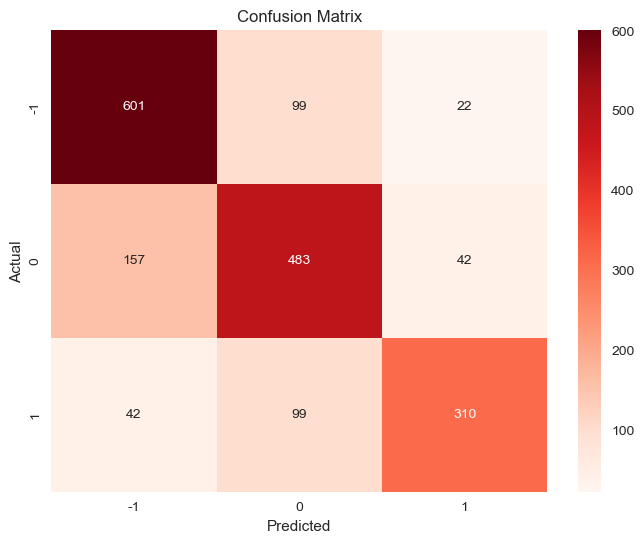

C:\Users\Soumya Ranjan Bhoi\AppData\Local\Temp\ipykernel_11736\2191598173.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


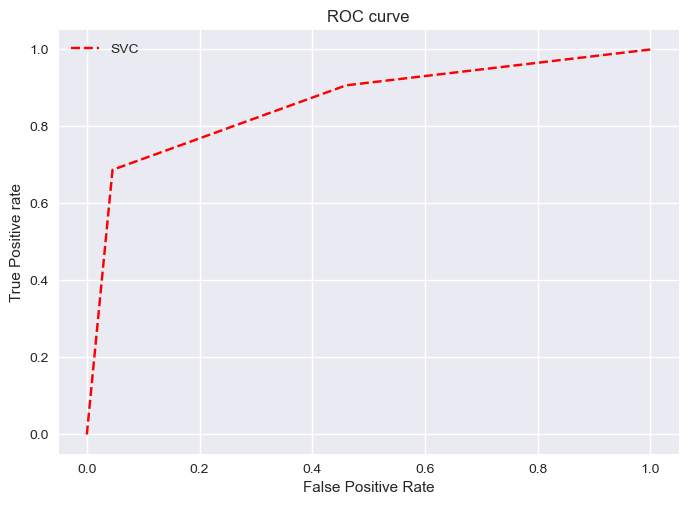

In [34]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train SVC classifier
clf = SVC(kernel='linear', C=1, probability=True, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

show_metrics(y_test, y_pred, "SVC")

## Random Forest Classifier

RF 
Accuracy : 0.7347708894878706
Precision : 0.7456943238890462
Recall : 0.7347708894878706
f1_score : 0.7313396969923903
RF confusion matrix : 
[[629  75  18]
 [193 464  25]
 [ 59 122 270]]
              precision    recall  f1-score   support

          -1       0.71      0.87      0.78       722
           0       0.70      0.68      0.69       682
           1       0.86      0.60      0.71       451

    accuracy                           0.73      1855
   macro avg       0.76      0.72      0.73      1855
weighted avg       0.75      0.73      0.73      1855



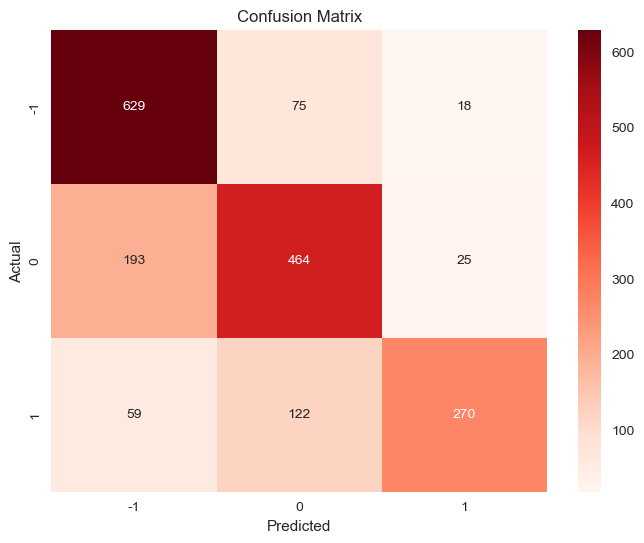

C:\Users\Soumya Ranjan Bhoi\AppData\Local\Temp\ipykernel_11736\2191598173.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


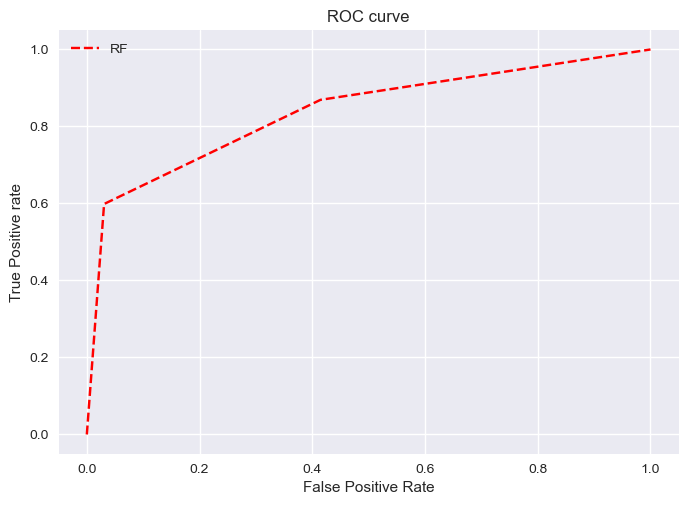

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)

show_metrics(y_test, y_pred, "RF")

## XG Boost Classifier
For XGBoost classifiers the Data labels are


<b>0. Negative</br>
<b>1. Neutral</br>
<b>2. Positive</br>

XGB 
Accuracy : 0.7223719676549866
Precision : 0.7252135869596754
Recall : 0.7223719676549866
f1_score : 0.7222158511704139
XGB confusion matrix : 
[[560 132  30]
 [149 481  52]
 [ 53  99 299]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       722
           1       0.68      0.71      0.69       682
           2       0.78      0.66      0.72       451

    accuracy                           0.72      1855
   macro avg       0.73      0.71      0.72      1855
weighted avg       0.73      0.72      0.72      1855



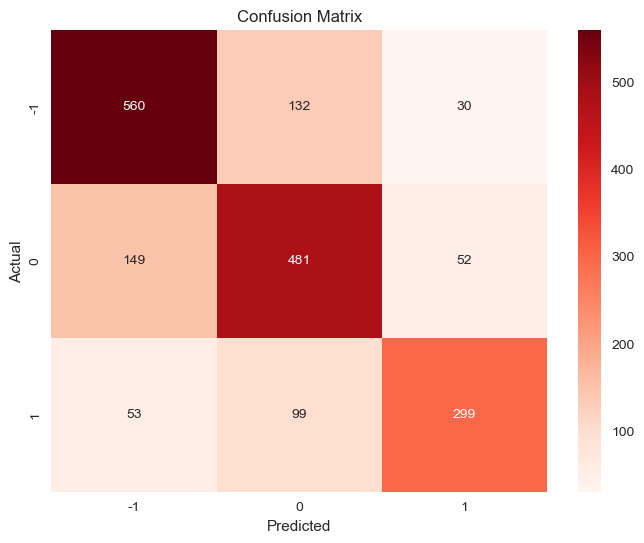

C:\Users\Soumya Ranjan Bhoi\AppData\Local\Temp\ipykernel_11736\2191598173.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


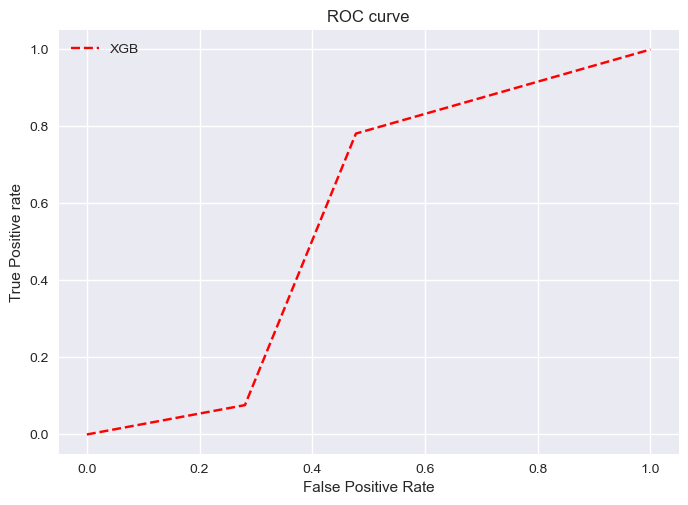

In [39]:
from sklearn.decomposition import TruncatedSVD
from xgboost import XGBClassifier 

y_train_xgb = y_train + 1
y_test_xgb = y_test + 1

pca = TruncatedSVD(n_components = 100)

X_train_xgb = pca.fit_transform(X_train)
X_test_xgb = pca.transform(X_test)


model = XGBClassifier()
model.fit(X_train_xgb, y_train_xgb)

# Predictions
y_pred = model.predict(X_test_xgb)
show_metrics(y_test_xgb, y_pred, "XGB")

## KNN Classifier

KNN 
Accuracy : 0.6145552560646901
Precision : 0.6688355606265048
Recall : 0.6145552560646901
f1_score : 0.6080906172887605
KNN confusion matrix : 
[[577 137   8]
 [297 376   9]
 [187  77 187]]
              precision    recall  f1-score   support

          -1       0.54      0.80      0.65       722
           0       0.64      0.55      0.59       682
           1       0.92      0.41      0.57       451

    accuracy                           0.61      1855
   macro avg       0.70      0.59      0.60      1855
weighted avg       0.67      0.61      0.61      1855



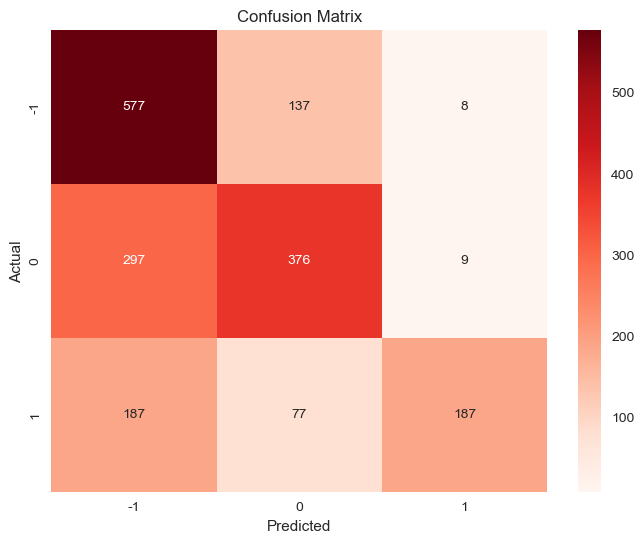

C:\Users\Soumya Ranjan Bhoi\AppData\Local\Temp\ipykernel_11736\2191598173.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


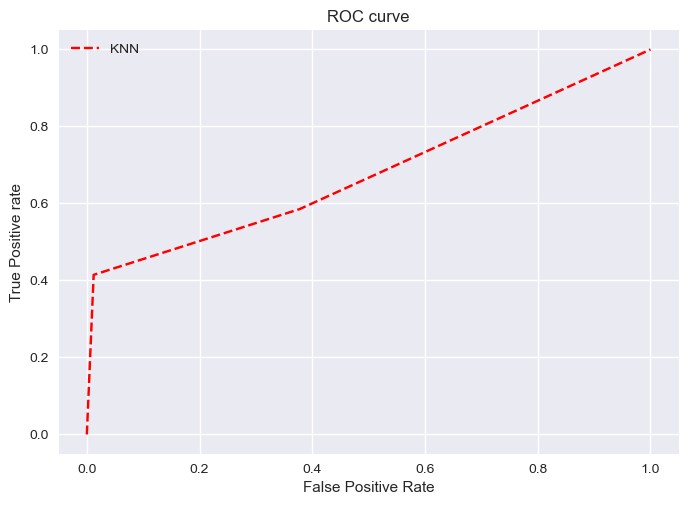

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier  = KNeighborsClassifier(n_neighbors=5)
knn_classifier .fit(X_train, y_train)
# Predictions
y_pred = knn_classifier .predict(X_test)
show_metrics(y_test, y_pred, "KNN")

## Logistic Classifier

LogReg 
Accuracy : 0.7353099730458221
Precision : 0.7416183293852157
Recall : 0.7353099730458221
f1_score : 0.7332501361734909
LogReg confusion matrix : 
[[610  90  22]
 [177 471  34]
 [ 49 119 283]]
              precision    recall  f1-score   support

          -1       0.73      0.84      0.78       722
           0       0.69      0.69      0.69       682
           1       0.83      0.63      0.72       451

    accuracy                           0.74      1855
   macro avg       0.75      0.72      0.73      1855
weighted avg       0.74      0.74      0.73      1855



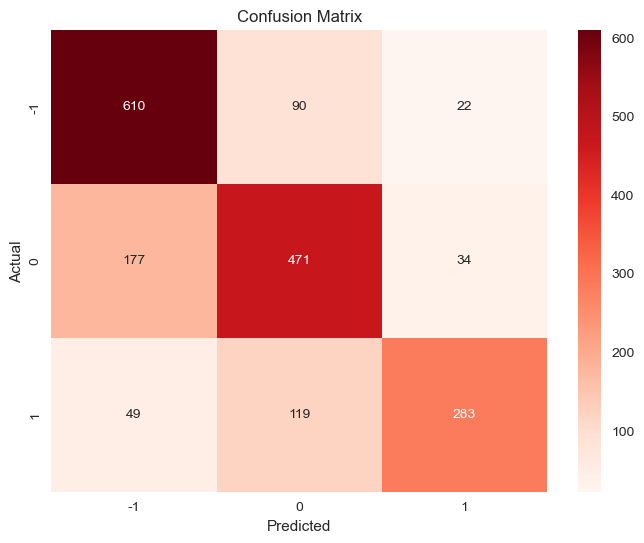

C:\Users\Soumya Ranjan Bhoi\AppData\Local\Temp\ipykernel_11736\2191598173.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


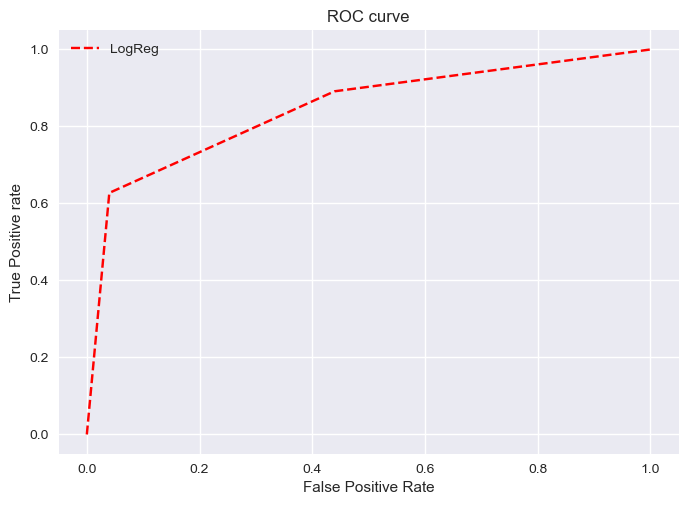

In [41]:
from sklearn.linear_model import LogisticRegression
# Define the Logistic Regression classifier
logistic_classifier = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000, random_state=42)
# Train the classifier
logistic_classifier.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = logistic_classifier.predict(X_test)

show_metrics(y_test, y_pred, "LogReg")

## AdaBoost Classifier

C:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaB 
Accuracy : 0.6307277628032345
Precision : 0.6373186771831388
Recall : 0.6307277628032345
f1_score : 0.6277707338649411
AdaB confusion matrix : 
[[556 151  15]
 [238 377  67]
 [ 51 163 237]]
              precision    recall  f1-score   support

          -1       0.66      0.77      0.71       722
           0       0.55      0.55      0.55       682
           1       0.74      0.53      0.62       451

    accuracy                           0.63      1855
   macro avg       0.65      0.62      0.62      1855
weighted avg       0.64      0.63      0.63      1855



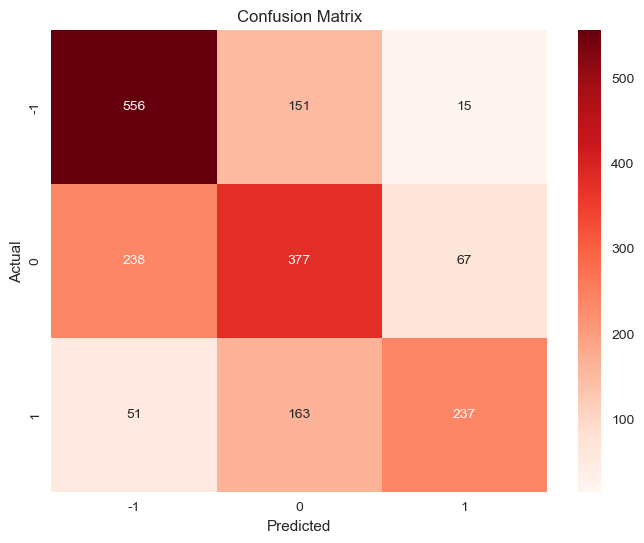

C:\Users\Soumya Ranjan Bhoi\AppData\Local\Temp\ipykernel_11736\2191598173.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


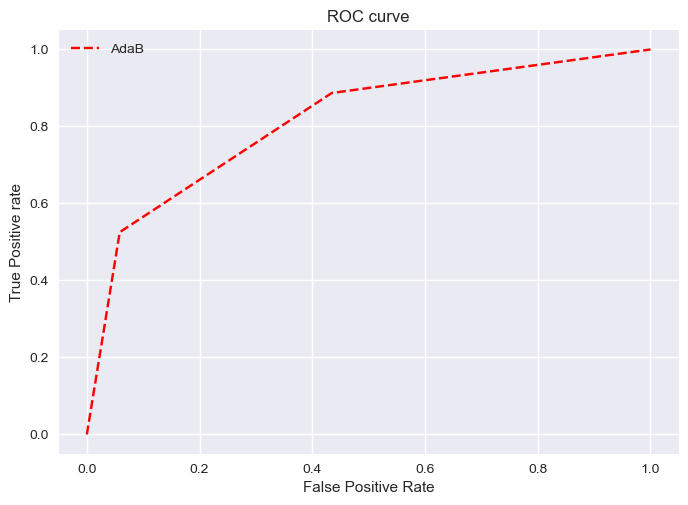

In [42]:
from sklearn.ensemble import AdaBoostClassifier
# Define the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
# Train the classifier
adaboost_classifier.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = adaboost_classifier.predict(X_test)

show_metrics(y_test, y_pred, "AdaB")

In [44]:
def metric_comparision(metric_dict, metric_name):
    model_name = list(metric_dict.keys())
    metric = list(metric_dict.values())

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(model_name, metric, width = 0.4)
    for i in range(len(model_name)):
        plt.text(i, metric[i], str(metric[i]), ha='center', va='bottom')
    plt.xlabel("Model Name")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} comparison")
    plt.show()

C:\Users\Soumya Ranjan Bhoi\AppData\Local\Temp\ipykernel_11736\3385721951.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


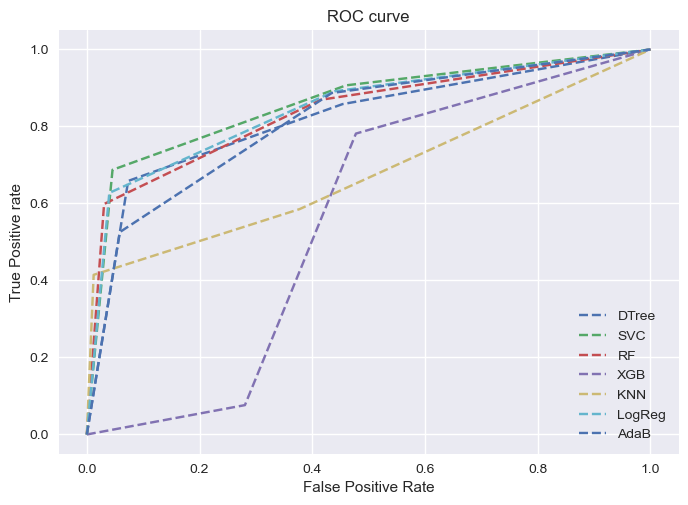

In [45]:
plt.style.use('seaborn')
for model_name in list(fpr_dict.keys()):
    plt.plot(fpr_dict[model_name], tpr_dict[model_name], linestyle='--', label=model_name)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show()

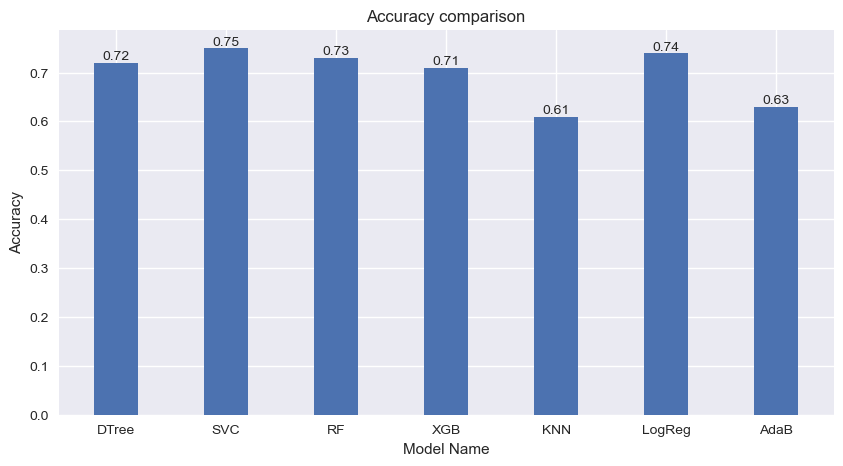

In [121]:
metric_comparision(accuracy_dict, "Accuracy")

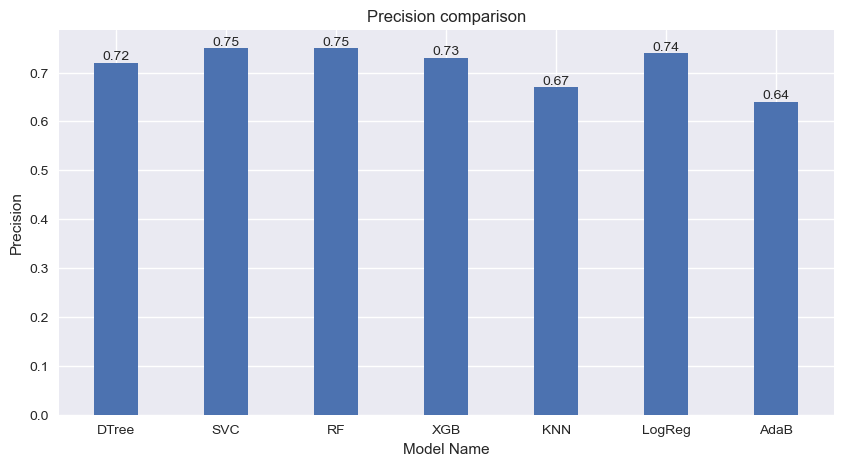

In [46]:
metric_comparision(precision_dict, "Precision")

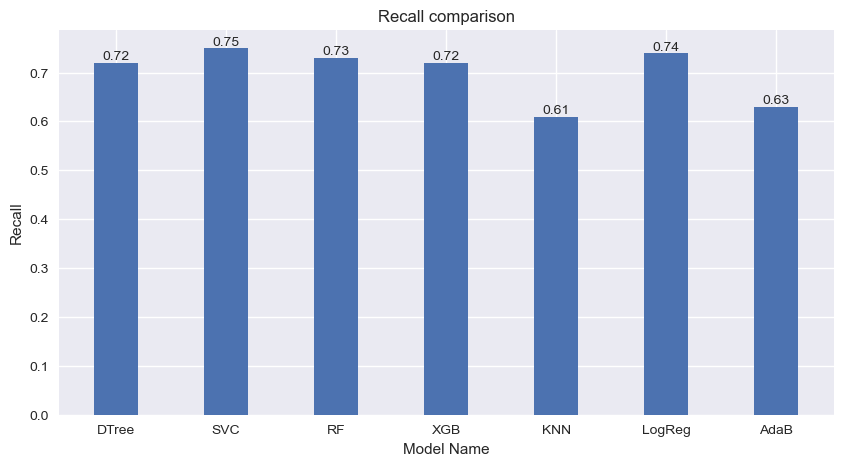

In [47]:
metric_comparision(recall_dict, "Recall")

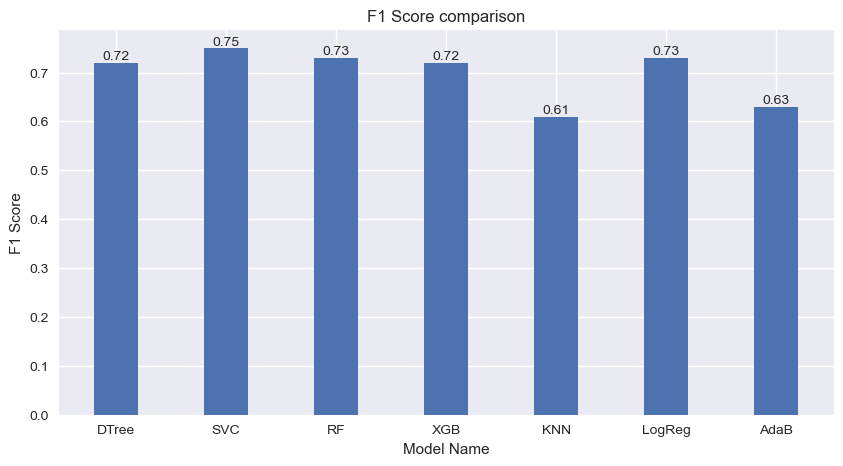

In [48]:
metric_comparision(f1_dict, "F1 Score")

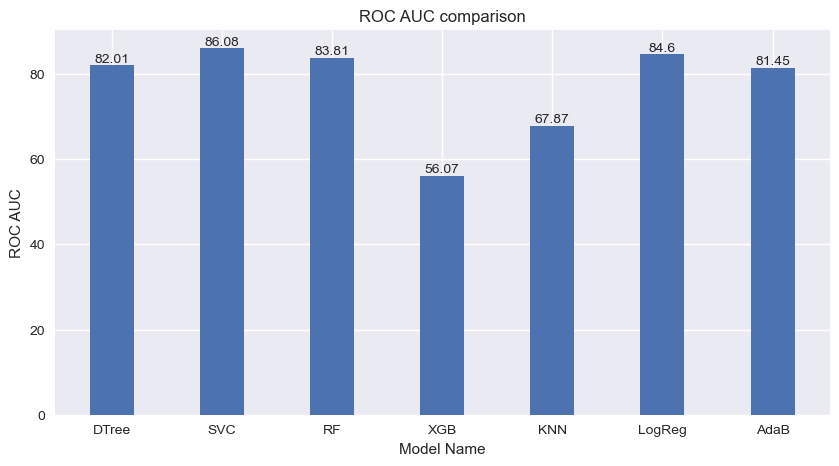

In [49]:
metric_comparision(auc_dict, "ROC AUC")

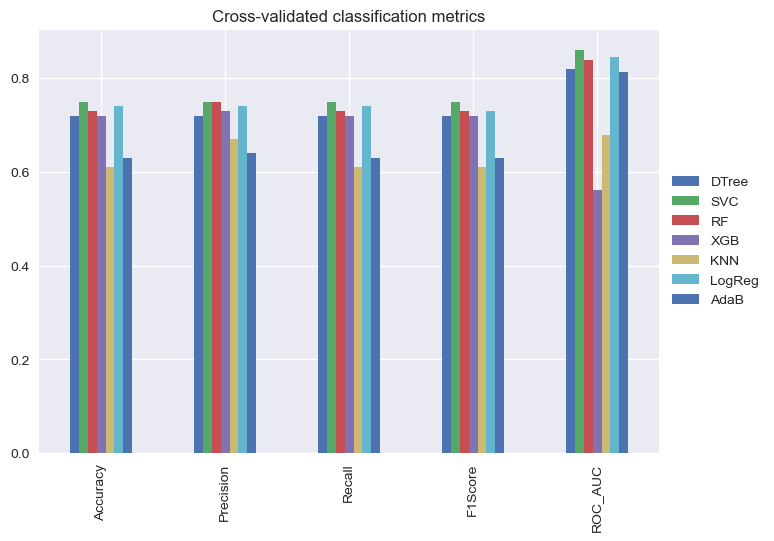

In [50]:
cv_metrics = pd.DataFrame({"Accuracy": accuracy_dict.values(),
                          "Precision": precision_dict.values(),
                          "Recall": recall_dict.values(),
                          "F1Score": f1_dict.values(),
                          "ROC_AUC": [x/100.0 for x in list(auc_dict.values())],
                          },
                          index=accuracy_dict.keys())
ax = cv_metrics.T.plot.bar(title="Cross-validated classification metrics")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))